#***1***. Реализация протокола Диффи-Хеллмана

Протокол обмена ключами Диффи-Хеллмана позволяет двум сторонам безопасно создать общий секретный ключ через небезопасный канал связи. Каждая сторона выбирает собственный закрытый ключ a and b и генерирует открытый ключ Ka and Kb с использованием общего простого числа p и первообразного корня g. После обмена этими открытыми ключами стороны независимо вычисляют общий секрет, что позволяет им общаться безопасно, используя этот общий секрет в качестве ключа шифрования. Этот процесс предотвращает перехват общего секрета со стороны подслушивающих и обеспечивает безопасную связь между сторонами.


шаг 1. Подключим библиотеки

In [ ]:
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import dh
from cryptography.hazmat.primitives.kdf.hkdf import HKDF

### Пояснение:

Импорт данного кода на Python использует библиотеку `cryptography`для выполнения криптографических операций.

1. `from cryptography.hazmat.primitives import hashes`: Этот код импортирует криптографические хеш-функции из библиотеки `cryptography`. Хеш-функции используются для создания фиксированного по размеру вывода (хеша) из входных данных.

2. `from cryptography.hazmat.primitives.asymmetric import dh`: Этот импорт относится к функционалу протокола обмена ключами Диффи-Хеллмана из библиотеки `cryptography`. Он позволяет использовать Диффи-Хеллмана для согласования ключей.

3. `from cryptography.hazmat.primitives.kdf.hkdf import HKDF`: Здесь импортируется HMAC-ориентированная функция производства ключей (HKDF) из библиотеки `cryptography`. HKDF используется для получения ключей из начального материала.

В целом, этот фрагмент кода импортирует необходимые модули из библиотеки `cryptography` для работы с криптографическими хеш-функциями (hash functions), протоколом обмена ключами Диффи-Хеллмана (Diffie-Hellman key exchange protocal) и производства ключей с помощью HKDF на языке программирования Python.

шаг 2. Создадим объект для генерации ключей

In [ ]:
parameters = dh.generate_parameters(generator=2, key_size=2048)

###Пояснение:
Эта строка создает параметры Диффи-Хеллмана с определенным генератором и размером ключа.

- `generator=2`: Указывает генератор для параметров Диффи-Хеллмана.
- `key_size=2048`: Определяет размер генерируемого ключа.

Эти параметры критически важны для безопасности и эффективности обмена ключами по протоколу Диффи-Хеллмана. Генератор - это число, которое помогает создавать открытые и закрытые ключи, а размер ключа определяет длину ключей, используемых в процессе обмена ключами, влияя на уровень безопасности обмениваемых ключей.

шаг 3. Получим закрытый ключ

In [ ]:
private_key = parameters.generate_private_key()
public_key = private_key.public_key()

###Пояснение:
Этот код генерирует закрытый ключ и соответствующий ему открытый ключ с использованием ранее определенных параметров Диффи-Хеллмана.

- `parameters.generate_private_key()`: Этот метод создает закрытый ключ на основе заданных параметров Диффи-Хеллмана. Этот закрытый ключ будет использоваться для дальнейших вычислений в процессе обмена ключами.

- `private_key.public_key()`: Из сгенерированного закрытого ключа этот код генерирует соответствующий открытый ключ. В протоколе обмена ключами Диффи-Хеллмана закрытый ключ должен оставаться секретным, в то время как открытый ключ может быть передан другим сторонам.


шаг 4. Получим параметры, которые были сгенерированы

In [ ]:
dh_numbers = parameters.parameter_numbers()

###Пояснение:
Этот код возвращает параметры чисел Диффи-Хеллмана (`dh_numbers`) на основе ранее созданных параметров. Эти числа включают в себя информацию, необходимую для проведения операций Диффи-Хеллмана, таких как основной модуль и генератор. `parameter_numbers()` предоставляет доступ к этим значениям для использования в дальнейших вычислениях или для отображения.

шаг 5. Передадим параметры другой стороне и сгенерируем объект для генерации ключей

In [ ]:
peer_parameters = dh.DHParameterNumbers(dh_numbers.p, dh_numbers.g).parameters()

###Пояснение:
Этот код создает числа параметров Диффи-Хеллмана (`peer_parameters`) на основе значений, полученных из `dh_numbers`, которые обычно включают в себя простое основание (`p`) и генератор (`g`). Он использует эти значения для генерации параметров, необходимых для установления протокола обмена ключами Диффи-Хеллмана с другой стороной или участником коммуникации. Эти параметры позволяют обеим сторонам договориться о том же наборе значений, необходимых для процесса обмена ключами.

шаг 6. Сгенерируем закрытый ключ на другой стороне

In [ ]:
peer_private_key = peer_parameters.generate_private_key()

###Пояснение:
Этот код создает закрытый ключ (`peer_private_key`) с использованием параметров (`peer_parameters`) в рамках протокола Диффи-Хеллмана. Этот закрытый ключ важен для генерации общего секретного ключа в процессе обмена ключами.

шаг 7. Получим публичный ключ другой стороны


In [ ]:
peer_public_key = peer_private_key.public_key()

###Пояснение:
Этот фрагмент кода создает открытый ключ (`peer_public_key`) на основе закрытого ключа (`peer_private_key`) в протоколе Диффи-Хеллмана. Открытый ключ будет использован для обмена данными с другой стороной и вычисления общего секретного ключа.

шаг 8. На основе публичного ключа другой стороны создаем общий ключ

In [ ]:
shared_key = private_key.exchange(peer_public_key)

###Пояснение:
 Эта строка кода выполняет операцию обмена открытыми ключами между вашим закрытым ключом (`private_key`) и открытым ключом другой стороны (`peer_public_key`) в протоколе Диффи-Хеллмана. Операция обмена ключами используется для создания общего секретного ключа, который может быть использован для шифрования данных, обеспечивая безопасную коммуникацию между двумя сторонами.

шаг 9. Аналогично получаем публичный ключ на другой стороне

In [ ]:
peer_shared_key = peer_private_key.exchange(public_key)

###Пояснение:
Эта строка кода выполняет операцию обмена открытыми ключами между закрытым ключом другой стороны (`peer_private_key`) и вашим открытым ключом (`public_key`) в протоколе Диффи-Хеллмана. Этот обмен ключами используется для создания общего секретного ключа между вами и другой стороной для безопасной передачи данных.

шаг 10. Преобразуем полученный общий ключ в ключ длиной 256-бит с помощью KDF KDF - функция, формирующая один или несколько секретных ключей на основе секретного значения (главный ключ, пароль или парольная фраза) с помощью псевдослучайной функции. Создаем объект HKDF, с помощью которого создадим ключ для симметричного шифрования.

In [ ]:
hkdf_obj = HKDF(
  algorithm=hashes.SHA256(),
  length=32,
  salt=None,
  info=b"",
)
peer_hkdf_obj = HKDF(
  algorithm=hashes.SHA256(),
  length=32,
  salt=None,
  info=b"",
)

###Пояснение:
Этот фрагмент кода создает объекты HKDF (HMAC-based Key Derivation Function) с использованием алгоритма хеширования SHA256 для обеих сторон.

Функция HKDF предназначена для получения дополнительных ключей или подключей на основе существующих ключей или другой информации. В данном случае, возможно, эти ключи будут выведены из общего секретного ключа, полученного в результате протокола Диффи-Хеллмана.

- `hkdf_obj`: Эта переменная представляет экземпляр объекта HKDF (HMAC-based Key Derivation Function). Он настроен на использование алгоритма хеширования SHA256 (`algorithm=hashes.SHA256()`). Предполагается, что он будет создавать ключи длиной 32 байта (`length=32`). Параметр `salt` установлен в `None`, что означает отсутствие дополнительной соли при процессе выработки ключей. Параметр `info` представляет собой пустую байтовую строку `b""`, указывающую отсутствие дополнительной информации для выработки ключей.

- `peer_hkdf_obj`: Подобно `hkdf_obj`, эта переменная представляет другой экземпляр объекта HKDF, настроенный аналогичным образом. Он также предназначен для выработки ключей длиной 32 байта с использованием алгоритма хеширования SHA256, без соли и дополнительной информации для выработки ключей.

шаг 11. Получим ключ длиной 256-бит

In [ ]:
derived_key = hkdf_obj.derive(shared_key)

### Пояснение:
Этот фрагмент кода вырабатывает ключ (`derived_key`) с использованием объекта HKDF (`hkdf_obj`) из общего ключа (`shared_key`). Предположительно, `shared_key` представляет общий секретный ключ, полученный в результате протокола обмена ключами Диффи-Хеллмана. Полученный ключ может быть использован для симметричного шифрования или других безопасностями операций.

шаг 12. Получим ключ длиной 256-бит на другой стороны

In [ ]:
peer_derived_key = peer_hkdf_obj.derive(peer_shared_key)

### Пояснение:
Эта строка кода вырабатывает ключ (`peer_derived_key`) с помощью объекта HKDF (`peer_hkdf_obj`) из общего ключа (`peer_shared_key`). Обычно `peer_shared_key` представляет собой общий секретный ключ, сгенерированный через протокол обмена ключами Диффи-Хеллмана. Полученный ключ может использоваться для симметричного шифрования или других операций, связанных с безопасностью.

шаг 13. Сравним полученные ключи

In [ ]:
print(f"Are keys equal: {derived_key == peer_derived_key}")

### Пояснение:
Эта строка кода сравнивает выведенные ключи (`derived_key` и `peer_derived_key`) и выводит сообщение о том, равны ли они. Она проверяет, совпадают ли ключи, выведенные независимо с каждой стороны протокола обмена ключами Диффи-Хеллмана (`hkdf_obj` и `peer_hkdf_obj`). Результатом будет логическое значение, указывающее, совпадают ли ключи.

#***2.Реализация алгоритма AES***

AES (Advanced Encryption Standard) — это широко используемый симметричный алгоритм шифрования. Он работает с фиксированным размером блока в 128 бит и поддерживает ключи размером 128, 192 или 256 бит. AES выполняет несколько раундов операций для шифрования открытого текста в шифротекст и обратно для дешифрования. Режимы работы, такие как ECB, CBC и другие, предлагают различные свойства для шифрования. Выбор режима, размера ключа и других параметров существенно влияет на безопасность и эффективность процесса шифрования.

шаг 1. Подключим библиотеки

In [ ]:
import os
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

### Пояснение:
это фрагмент кода импортирует необходимые модули и функционал из библиотеки `cryptography` на языке Python для целей шифрования.

- `os`: Этот модуль предоставляет способы работы с функциями операционной системы, например, генерацию случайных байтов (`os.urandom()`).

- `padding`: Этот модуль из `cryptography.hazmat.primitives` содержит функции для дополнения данных, например `padding.PKCS7`, которая используется для того, чтобы убедиться, что открытый текст подходит под размер блока шифра.

- `Cipher`, `algorithms`, `modes`: Это функционал из модуля `cryptography.hazmat.primitives.ciphers`.
    - `Cipher`: Представляет симметричный шифр, облегчая шифрование и дешифрование.
    - `algorithms`: Содержит различные алгоритмы шифрования, такие как AES, Triple DES и др.
    - `modes`: Содержит различные режимы работы для шифрования (например, ECB, CBC, CTR), влияющие на то, как блоки открытого текста шифруются и объединяются.


шаг 2. Создадим функцию для реализации алгоритма

In [ ]:
def check_cipher_suite(cipher_suite, padding_algorithm):
  # Получим объекты для шифрования и паддинга
  encryptor = cipher_suite.encryptor()
  padder = padding_algorithm.padder()
  # Текст, который будем шифровать
  plain_text = b"ITMO"
  # Сделаем паддинг текста
  padded_plain_text = padder.update(plain_text) + padder.finalize()
  print(f"Padded text: {padded_plain_text}")
  # Зашифруем текст
  cipher_text = encryptor.update(padded_plain_text) + encryptor.finalize()
  print(f"Cipher text: {cipher_text}")
  # Получим объекты для дешифрования и анпаддинга
  decryptor = cipher_suite.decryptor()
  unpadder = padding_algorithm.unpadder()
  # Получим расшифрованный текст, к которому применен паддинг
  padded_plain_text = decryptor.update(cipher_text) + decryptor.finalize()
  print(f"Decrypted text: {padded_plain_text}")
  # Получим текст, который был зашифрован
  plain_text = unpadder.update(padded_plain_text) + unpadder.finalize()
  print(f"Unpadded text: {plain_text}")

### Пояснение:
Эта функция на Python, `check_cipher_suite`, принимает `cipher_suite` и `padding_algorithm` для демонстрации операций шифрования и дешифрования.

Вот краткое описание функции:

1. **Процесс шифрования**:
   - Получаются объекты `encryptor` и `padder` из `cipher_suite` и `padding_algorithm` соответственно.
   - Определяется открытый текст (`b"ITMO"`).
   - К открытому тексту применяется дополнение с помощью `padder`.
   - Полученный дополненный текст шифруется с использованием `encryptor`, что дает `cipher_text`.

2. **Процесс дешифрования**:
   - Получаются объекты `decryptor` и `unpadder`.
   - `cipher_text` дешифруется для извлечения дополненного открытого текста.
   - К полученному дополненному тексту применяется дешифрование для получения исходного открытого текста.

3. **Вывод**:
   - Для демонстрации выводятся дополненный текст, шифрованный текст, дешифрованный текст с примененным дополнением и окончательный дешифрованный текст без дополнения.

Эта функция иллюстрирует процесс шифрования и дешифрования с использованием заданного набора шифрования и алгоритма дополнения. Она представляет собой демонстрационный пример, демонстрирующий операции шифрования/дешифрования вместе с операциями дополнения.

шаг 3. Сгенерируем ключ и вектор инициализации

In [ ]:
key = os.urandom(16) # 128-битовый ключ
iv = os.urandom(16) # вектор инициализации

###Пояснение:
Этот фрагмент кода генерирует ключ длиной 128 бит (`key`) и вектор инициализации (IV) (`iv`), которые используются в криптографических операциях, таких как шифрование AES.

- `os.urandom(16)`: Генерирует последовательность из 16 случайных байтов с использованием источника случайности системы. В данном случае это используется для создания ключа длиной 128 бит.
- `os.urandom(16)`: Аналогично генерирует еще одну последовательность из 16 байт, используемую в качестве вектора инициализации (IV). IV используется в определенных режимах работы, например, CBC (Cipher Block Chaining), чтобы гарантировать различные шифротексты даже в случае многократного шифрования одного и того же открытого текста с одним ключом.

Эти значения критически важны для криптографических операций, обеспечивая случайность и уникальность ввода, необходимые для обеспечения безопасности при шифровании или дешифровании данных.

шаг 4. Создадим объект с набором инструментов для работы с AES в режиме CBC

In [ ]:
cipher_suite = Cipher(algorithms.AES(key), modes.CBC(iv))

###Пояснение:
Этот участок кода инициализирует набор шифрования с использованием алгоритма AES в режиме Cipher Block Chaining (CBC).

- `algorithms.AES(key)`: Указывает, что алгоритм AES будет использоваться для операций шифрования и дешифрования. Здесь `key` представляет собой ключ шифрования.
- `modes.CBC(iv)`: Выбирает режим CBC для набора шифрования и определяет вектор инициализации (IV) `iv` для этого режима.

Режим шифрования CBC (Cipher Block Chaining) работает с блоками текста, объединяя зашифрованный текст одного блока с открытым текстом следующего. IV (Initialization Vector) используется для создания уникальности шифротекста: он XOR'ится с первым блоком перед шифрованием и с каждым следующим блоком в процессе шифрования, обеспечивая различные шифротексты, даже при повторном использовании ключа для одного и того же открытого текста.

шаг 5. Для паддинга будем использовать PKCS7. Размер блока шифрования - 128 бит (AES)

In [ ]:
check_cipher_suite(cipher_suite, padding.PKCS7(128))
print()
key = os.urandom(16) # 128-битовый ключ

###Пояснение:
Этот фрагмент вызывает функцию `check_cipher_suite` с указанным `cipher_suite` и PKCS7-паддингом в 128 битов. После этого создается новый 128-битный ключ с помощью `os.urandom(16)`.

- `check_cipher_suite(cipher_suite, padding.PKCS7(128))`: Вызывает функцию `check_cipher_suite` с указанным `cipher_suite` и паддингом PKCS7 в 128 бит.
- `os.urandom(16)`: Генерирует новый случайный 128-битовый ключ с помощью системно-зависимого генератора случайных чисел (`os.urandom`) для обеспечения безопасности создания ключа.

шаг 6. Создадим объект с набором инструментов для работы с AES в режиме ECB

In [ ]:
cipher_suite = Cipher(algorithms.AES(key), modes.ECB())

###Пояснение:
Этот участок кода настраивает набор шифрования с использованием алгоритма AES в режиме Electronic Codebook (ECB) с указанным ключом.

- `Cipher(algorithms.AES(key), modes.ECB())`: Инициализирует набор шифрования с использованием алгоритма AES и режима ECB. `key` представляет собой ключ шифрования, который будет использоваться для операций шифрования и дешифрования AES.

Режим ECB разбивает открытый текст на блоки и шифрует каждый блок независимо с использованием одного и того же ключа. Однако этот режим может иметь уязвимости из-за одинакового шифрования блоков, что приводит к образованию шаблонов или повторяющихся блоков в шифротексте. Поэтому режим ECB обычно не рекомендуется для безопасного шифрования нескольких блоков данных.

шаг 7. Для паддинга будем использовать PKCS7. Размер блока шифрования - 128 бит (AES)

In [ ]:
check_cipher_suite(cipher_suite, padding.PKCS7(128))
print()
key = os.urandom(16) # 128-битовый ключ

###Пояснение:
Этот код вызывает функцию `check_cipher_suite` с установленным набором шифрования и паддингом PKCS7 в 128 бит. Затем создается новый случайный 128-битовый ключ с использованием `os.urandom(16)`.

Функция `check_cipher_suite(cipher_suite, padding.PKCS7(128))` предположительно выполняет операции шифрования или дешифрования с использованием указанного набора шифрования и заданного паддинга PKCS7 в 128 бит. Далее, `os.urandom(16)` создает новый случайный ключ размером 128 бит для возможных последующих криптографических операций.

шаг 8. Создадим объект с набором инструментов для работы с AES в режиме ECB

In [ ]:
cipher_suite = Cipher(algorithms.AES(key), modes.ECB())

###Пояснение:
Этот код создает набор шифрования с использованием алгоритма AES в режиме Electronic Codebook (ECB) с заданным ключом.

- `Cipher(algorithms.AES(key), modes.ECB())`: Инициализирует набор шифрования с использованием алгоритма AES и режима ECB. Переменная `key` представляет ключ шифрования, используемый для операций шифрования и дешифрования AES.

Режим ECB разбивает открытый текст на блоки фиксированного размера и шифрует каждый блок отдельно с использованием одного и того же ключа. Однако этот режим может иметь уязвимости из-за одинакового шифрования блоков, что может выявить шаблоны в шифротексте. Поэтому режим ECB обычно не рекомендуется для безопасного шифрования нескольких блоков данных.

шаг 9. Для паддинга будем использовать ANSIX923. Размер блока шифрования - 128 бит (AES)

In [ ]:
check_cipher_suite(cipher_suite, padding.ANSIX923(128))
print()
key = os.urandom(24) # 192-битовый ключ

Этот фрагмент кода, скорее всего, вызывает функцию `check_cipher_suite` с определенным набором шифрования и использованием заполнения ANSIX923 в 128 бит. Затем генерируется новый случайный ключ размером 192 бита с помощью `os.urandom(24)`.

Вызов функции `check_cipher_suite(cipher_suite, padding.ANSIX923(128))` вероятно выполняет операции шифрования или дешифрования с использованием указанного набора шифрования и заполнения ANSIX923 в 128 бит. После этого `os.urandom(24)` генерирует новый случайный ключ размером 192 бита для возможных последующих криптографических операций.

шаг 10. Создадим объект с набором инструментов для работы с Camellia в режиме ECB

In [ ]:
cipher_suite = Cipher(algorithms.Camellia(key), modes.ECB())

###Пояснение:
Этот код создает набор шифрования, используя алгоритм Camellia в режиме Electronic Codebook (ECB) с заданным ключом.

- `Cipher(algorithms.Camellia(key), modes.ECB())`: Инициализирует набор шифрования с использованием алгоритма Camellia и режима ECB. Переменная `key` представляет ключ шифрования, используемый для операций шифрования и дешифрования с использованием алгоритма Camellia.

Режим ECB работает путем разбиения открытого текста на блоки фиксированного размера и шифрования каждого блока отдельно с использованием одного и того же ключа. Однако, аналогично AES в режиме ECB, этот режим может иметь уязвимости из-за одинакового шифрования блоков, что может привести к образованию шаблонов в шифротексте.

шаг 11. Для паддинга будем использовать PKCS7. Размер блока шифрования - 128 бит (Camellia)

In [ ]:
check_cipher_suite(cipher_suite, padding.PKCS7(128))
print()

###Пояснение:
Этот код вероятно вызывает функцию `check_cipher_suite` с установленным набором шифрования, используя алгоритм Camellia в режиме ECB и паддинг PKCS7 в 128 бит. После этого происходит вывод чего-то (возможно, результатов выполнения функции).

Функция `check_cipher_suite`, возможно, выполняет операции шифрования или дешифрования с использованием указанного набора шифрования и паддинга PKCS7 в 128 бит.

# QUESTIONS

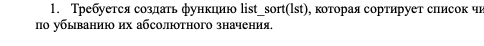

In [14]:
def list_sort(lst):
  lst.sort(key=lambda num: (abs(num), lst), reverse=True)
  return lst

lst_nums = list(map(int, input("Please Enter the Numbers sep='': ").split()))
result = list_sort(lst_nums)
print(result)

Please Enter the Numbers sep='': -1 2 -5 19 -23 -67 99
[99, -67, -23, 19, -5, 2, -1]


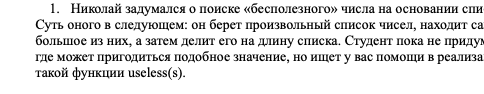

In [15]:
def useless_function(num_lst):
  return max(num_lst) / len(num_lst)

numbers = list(map(int, input('Please Enter list of numbers sep="": ').split()))
res = useless_function(numbers)
print(res)

Please Enter list of numbers sep="": -1 2 -5 19 -23 -67 99
14.142857142857142
